

#Load libraries

In [1]:
#Set up google colab working environment
!git clone https://github.com/zrosen3/Colombian-peso-counterfeit-detection.git
%cd /content/Colombian-peso-counterfeit-detection/Code
!pwd

fatal: destination path 'Colombian-peso-counterfeit-detection' already exists and is not an empty directory.
/content/Colombian-peso-counterfeit-detection/Code
/content/Colombian-peso-counterfeit-detection/Code


In [2]:
import matplotlib.pyplot as plt #For plotting our visualizations
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import cv2
from PIL import Image
import seaborn as sns
import keras
import common_functions as cf

#Load in data

In [3]:
train_ds, test_ds, validation_ds, class_names =  cf.LoadData()


Found 12479 files belonging to 13 classes.
Found 4160 files belonging to 13 classes.
Found 4160 files belonging to 13 classes.


## Run MobileNet model

In [4]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 480, 640, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [5]:
#initialize model
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

#Base mobile net model
inputs = tf.keras.Input(shape=(480, 640, 3))
resized = tf.image.resize(inputs, (224, 224))
x = keras.applications.MobileNetV2(input_shape = (224, 224, 3), include_top = False, alpha = 0.5)(resized, training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Rescaling(1./255)(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(13, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

#Additional classification layer
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(
    train_ds,
    validation_data=validation_ds,
    batch_size = 32,
    epochs=5
)

3201480/3201480 [==============================] - 0s 0us/step
Epoch 1/5
390/390 [==============================] - 1146s 3s/step - loss: 2.5659 - accuracy: 0.0714 - val_loss: 2.5651 - val_accuracy: 0.0769
Epoch 2/5
390/390 [==============================] - 1080s 3s/step - loss: 2.5659 - accuracy: 0.0712 - val_loss: 2.5651 - val_accuracy: 0.0769
Epoch 3/5
390/390 [==============================] - 1042s 3s/step - loss: 2.5658 - accuracy: 0.0712 - val_loss: 2.5651 - val_accuracy: 0.0769
Epoch 4/5
390/390 [==============================] - 1010s 3s/step - loss: 2.5658 - accuracy: 0.0726 - val_loss: 2.5652 - val_accuracy: 0.0769
Epoch 5/5
390/390 [==============================] - 1001s 3s/step - loss: 2.5659 - accuracy: 0.0712 - val_loss: 2.5651 - val_accuracy: 0.0769


Evaluate model

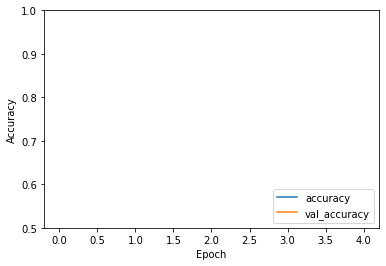

130/130 - 77s - loss: 2.5651 - accuracy: 0.0769 - 77s/epoch - 596ms/step
Test loss: 2.565128803253174 | Test accuracy: 0.07692307978868484


In [6]:
cf.EvaluateModel(model, test_ds, history)
